## Tutorial on Automated Machine Learning using MLBox

In [ ]:
!pip install mlbox

     |████████████████████████████████| 20.2 MB 122 kB/s 
     |████████████████████████████████| 13.0 MB 92.2 MB/s 
     |████████████████████████████████| 1.9 MB 34.9 MB/s 
     |████████████████████████████████| 10.4 MB 58.0 MB/s 
     |████████████████████████████████| 294 kB 74.9 MB/s 
     |████████████████████████████████| 7.0 MB 55.1 MB/s 
     |████████████████████████████████| 86.3 MB 1.2 MB/s 
     |████████████████████████████████| 1.2 MB 74.1 MB/s 
     |████████████████████████████████| 4.3 MB 68.9 MB/s 
     |████████████████████████████████| 103 kB 98.5 MB/s 
     |████████████████████████████████| 1.7 MB 63.2 MB/s 
     |████████████████████████████████| 3.8 MB 66.9 MB/s 
     |████████████████████████████████| 50 kB 8.2 MB/s 
     |████████████████████████████████| 449 kB 88.2 MB/s 
  Created wheel for mlbox: filename=mlbox-0.8.5-py3-none-any.whl size=43754 sha256=04e5a57c752253fecf24354bf5cca1c659432e276c172463c9051d2c9f3e3c6a
  Stored in directory: /root/.cache/pip/

In [ ]:
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *

In [ ]:
target_name='SalePrice'
rd=Reader(sep=",")
df=rd.train_test_split(['/content/house_train.csv','/content/house_test.csv'],target_name)


reading csv : house_train.csv ...
cleaning data ...
CPU time: 3.819174289703369 seconds

reading csv : house_test.csv ...
cleaning data ...
CPU time: 0.21322965621948242 seconds

> Number of common features : 80

gathering and crunching for train and test datasets ...
reindexing for train and test datasets ...
dropping training duplicates ...
dropping constant variables on training set ...

> Number of categorical features: 43
> Number of numerical features: 37
> Number of training samples : 1460
> Number of test samples : 1459

> Top sparse features (% missing values on train set):
PoolQC         99.5
MiscFeature    96.3
Alley          93.8
Fence          80.8
FireplaceQu    47.3
dtype: float64

> Task : regression
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [ ]:
df

{'target': 0       208500.0
 1       181500.0
 2       223500.0
 3       140000.0
 4       250000.0
           ...   
 1455    175000.0
 1456    210000.0
 1457    266500.0
 1458    142125.0
 1459    147500.0
 Name: SalePrice, Length: 1460, dtype: float64,
 'test':       1stFlrSF  2ndFlrSF  3SsnPorch  ... YearBuilt  YearRemodAdd  YrSold
 0        896.0       0.0        0.0  ...    1961.0        1961.0  2010.0
 1       1329.0       0.0        0.0  ...    1958.0        1958.0  2010.0
 2        928.0     701.0        0.0  ...    1997.0        1998.0  2010.0
 3        926.0     678.0        0.0  ...    1998.0        1998.0  2010.0
 4       1280.0       0.0        0.0  ...    1992.0        1992.0  2010.0
 ...        ...       ...        ...  ...       ...           ...     ...
 1454     546.0     546.0        0.0  ...    1970.0        1970.0  2006.0
 1455     546.0     546.0        0.0  ...    1970.0        1970.0  2006.0
 1456    1224.0       0.0        0.0  ...    1960.0        1996.0  200

In [ ]:
dft = Drift_thresholder()
df = dft.fit_transform(df)   #removing non-stable features (like ID,...)


computing drifts ...
CPU time: 0.7172331809997559 seconds

> Top 10 drifts

('Id', 0.9979452054794522)
('Exterior1st', 0.045971142705711676)
('YearBuilt', 0.04312338265581528)
('TotalBsmtSF', 0.03901739993992037)
('BedroomAbvGr', 0.03900894013422951)
('OpenPorchSF', 0.03750214744953517)
('LotFrontage', 0.03612153882230951)
('GarageCars', 0.034978279677340796)
('MoSold', 0.032186976249478416)
('SaleType', 0.031581651604274175)

> Deleted variables : ['Id']
> Drift coefficients dumped into directory : save


In [ ]:
space = {
    
        'est__strategy':{"search":"choice",
                                  "space":["LightGBM"]},    
        'est__n_estimators':{"search":"choice",
                                  "space":[150]},    
        'est__colsample_bytree':{"search":"uniform",
                                  "space":[0.8,0.95]},
        'est__subsample':{"search":"uniform",
                                  "space":[0.8,0.95]},
        'est__max_depth':{"search":"choice",
                                  "space":[5,6,7,8,9]},
        'est__learning_rate':{"search":"choice",
                                  "space":[0.07]} 
    
        }
params = Optimiser().optimise(space, df,15)

##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.9087764561911426, 'learning_rate': 0.07, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.9490485474674651, 'boosting_type': 'gbdt', 'class_weight': None, 'importance_type': 'split', 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
  0%|          | 0/15 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.7/dist-packages/mlbox/optimisation/optimiser.py:74: UserWarning: Optimiser will save all your fitted models into directory 'save/joblib'. Please clear it regularly.
  +str(self.to_path)+"/joblib'. Please clear it regularly.")


MEAN SCORE : neg_mean_squared_error = -892761909.2105765
VARIANCE : 8052552.570852518 (fold 1 = -884709356.639724, fold 2 = -900814461.781429)
CPU time: 0.47418737411499023 seconds
##################################################### testing hyper-parameters... #####################################################
>>> NA ENCODER :{'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}
>>> CA ENCODER :{'strategy': 'label_encoding'}
>>> ESTIMATOR :{'strategy': 'LightGBM', 'colsample_bytree': 0.8694928102568567, 'learning_rate': 0.07, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.8348100171450245, 'boosting_type': 'gbdt', 'class_weight': None, 'importance_type': 'split', 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': True, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'nthread': -1, 'seed': 0}
MEAN SCORE : neg_mean_squared_

In [ ]:
params

{'est__colsample_bytree': 0.8079769671461026,
 'est__learning_rate': 0.07,
 'est__max_depth': 5,
 'est__n_estimators': 150,
 'est__strategy': 'LightGBM',
 'est__subsample': 0.8953956505383934}


fitting the pipeline ...
CPU time: 0.17470407485961914 seconds


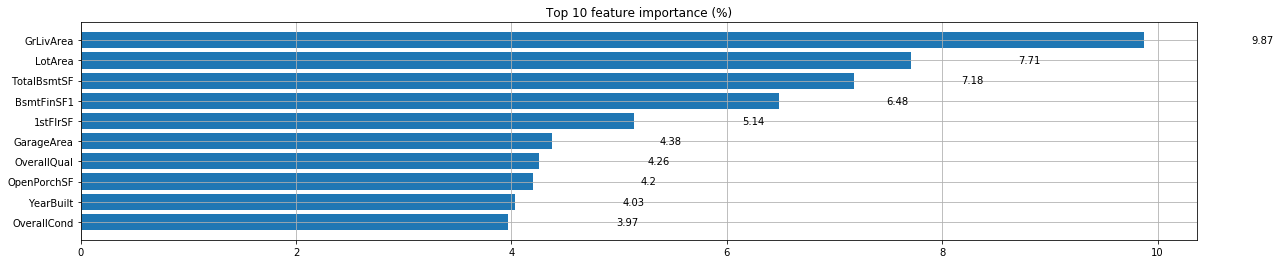


> Feature importances dumped into directory : save

predicting...
CPU time: 0.0771944522857666 seconds

> Overview on predictions : 

   SalePrice_predicted
0        127133.787006
1        158101.979874
2        180166.754581
3        187232.923714
4        194121.689654
5        172435.752519
6        175803.178895
7        170431.065716
8        183851.171272
9        128433.589956

dumping predictions into directory : save ...


In [ ]:
prd = Predictor()
prd.fit_predict(params,df)